<a href="https://colab.research.google.com/github/DCCheryl/Web-scraping-project/blob/main/Web_scraping_rotten_tomatoes_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
pip install requests beautifulsoup4 requests-html

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.8 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=3c812dbd22145233ee5cb388d849e612b7d60e6f022d01ae46263b95514a25f5
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import matplotlib.pyplot as plt
import nltk.data
from requests_html import HTMLSession

In [ ]:
url = 'https://editorial.rottentomatoes.com/guide/worst-blockbusters/'

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')


In [ ]:
# find all div elements with specific class
divs = soup.find_all('div', {'class' : 'col-sm-18 col-full-xs countdown-item-content'})

In [ ]:
# Fetch all the elements with 'h2' in div class
headers = []

for div in divs:
    header = div.h2
    headers.append(header)

In [ ]:
# Movie Name (Table column)
# find movie name with element 'a' in each header and append to a list
movie_names = []
for header in headers:
    movie_name = header.find('a').string
    movie_names.append(movie_name)

In [ ]:
# Year of release  (Table column)
# find movie name with element 'span' in each header and append to a list
movie_years = []
for header in headers:
    movie_year = header.find('span', class_='subtle start-year').string.strip('()')
    movie_years.append(movie_year)

In [ ]:
# Ratings  (Table column)
# find movie name with element 'span' in each header and append to a list
movie_rates = []
for header in headers:
    movie_rate = header.find('span', class_='tMeterScore').string.strip('%')
    movie_rates.append(movie_rate)

In [ ]:
# convert the rate from string to integer
movie_rates = [int(rate) for rate in movie_rates]

In [ ]:
# Find all div elements with specific class "info director"
directors = []

for div in divs:
    director = div.find('div', class_='info director')
    directors.append(director)

In [ ]:
# Director (Table column)
# find movie name with element 'a' in each class "info director" and append to a list
movie_directors = []

for director in directors:
    movie_director = director.find('a').string
    movie_directors.append( movie_director)

In [ ]:
# Find all div elements with specific class "info cast"
casting = []

for div in divs:
    cast = div.find('div', class_='info cast')
    casting.append(cast)

In [ ]:
# Director (Table column)
# find actor/actress name with element 'a' in each class "info cast" and append to a list
casting_list = []

for cast in casting:
    casting_name = []
    casting_link = cast.find_all('a')

    for name in casting_link:
        casting_name.append(name.string)

    casting_list.append(', '.join(casting_name))

In [ ]:
# create pandas-dataframe
movies_df = pd.DataFrame()
movies_df['Name'] = movie_names
movies_df['Year'] = movie_years
movies_df['Rating'] = movie_rates
movies_df['Director'] = movie_directors
movies_df['Cast'] = casting_list
movies_df

,Name,Year,Rating,Director,Cast
0,The Last Airbender,2010,5,M. Night Shyamalan,"Noah Ringer, Dev Patel, Nicola Peltz, Jackson ..."
1,Grown Ups 2,2013,8,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S..."
2,Little Fockers,2010,9,Paul Weitz,"Robert De Niro, Ben Stiller, Owen Wilson, Dust..."
3,Crocodile Dundee II,1988,9,John Cornell,"Paul Hogan, Linda Kozlowski, Charles S. Dutton..."
4,Dr. Seuss' The Cat in the Hat,2003,10,Bo Welch,"Mike Myers, Alec Baldwin, Kelly Preston, Dakot..."
...,...,...,...,...,...
56,G.I. Joe: Retaliation,2013,29,Jon M. Chu,"Dwayne Johnson, Bruce Willis, Channing Tatum, ..."
57,Fast & Furious,2009,28,Justin Lin,"Vin Diesel, Paul Walker, Michelle Rodriguez, J..."
58,Batman v Superman: Dawn of Justice,2016,29,Zack Snyder,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei..."
59,Independence Day: Resurgence,2016,29,Roland Emmerich,"Liam Hemsworth, Jeff Goldblum, Bill Pullman, M..."


In [ ]:
# Count the frequency of name of each actor/actress
cast_names = movies_df['Cast'].str.split(', ').explode()

name_counts = cast_names.value_counts()

print(name_counts)

Adam Sandler           6
Dakota Johnson         3
Jamie Dornan           3
Kevin James            3
Jon Favreau            3
                      ..
Neil Patrick Harris    1
Jayma Mays             1
Sofía Vergara          1
Madeleine Stowe        1
Ashley Greene          1
Name: Cast, Length: 197, dtype: int64


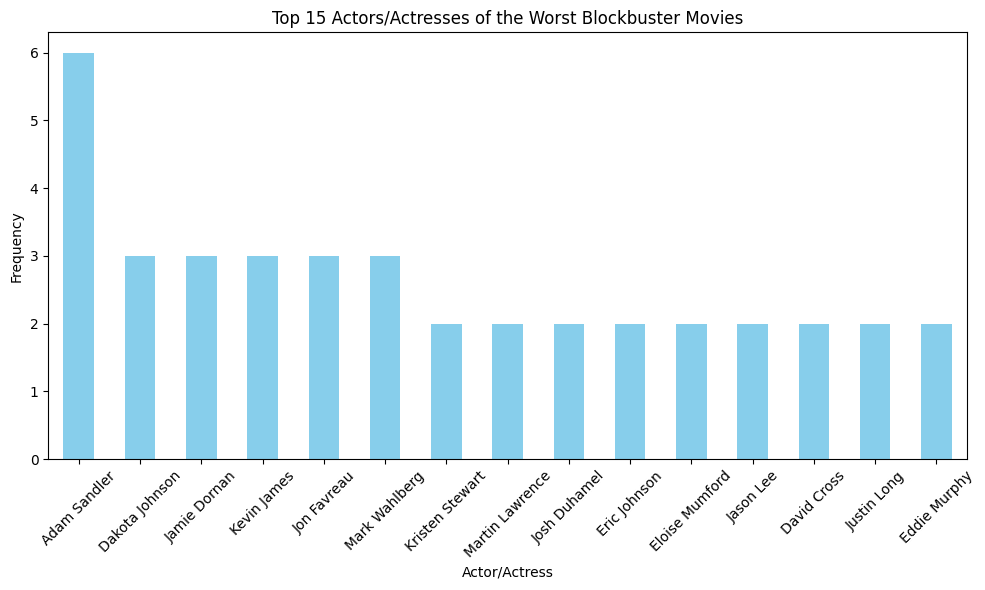

In [213]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
name_counts[:15].plot(kind='bar', color='skyblue')
plt.title('Top 15 Actors/Actresses of the Worst Blockbuster Movies')
plt.xlabel('Actor/Actress')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()

In [ ]:
# Count the frequency of each director
director_counts = movies_df['Director'].value_counts()
director_counts

Michael Bay            5
Dennis Dugan           4
Tom Shadyac            2
James Foley            2
Adam Shankman          2
Seth Gordon            2
Tim Story              2
Colin Trevorrow        1
Tim Hill               1
Shawn Levy             1
Roland Emmerich        1
Corin Hardy            1
Sam Taylor-Johnson     1
Ron Howard             1
Bill Condon            1
Peter Segal            1
Zack Snyder            1
Louis Leterrier        1
Mark Steven Johnson    1
Justin Lin             1
Steve Carr             1
Brian Levant           1
Bruce Beresford        1
Jon M. Chu             1
Robert Schwentke       1
Trish Sie              1
Stephen Sommers        1
M. Night Shyamalan     1
Hoyt H. Yeatman Jr.    1
Barry Sonnenfeld       1
Paul Weitz             1
John Cornell           1
Bo Welch               1
Peter Billingsley      1
Mike Mitchell          1
Rob Cohen              1
Eric Brevig            1
Walt Becker            1
Garry Marshall         1
Steven Brill           1


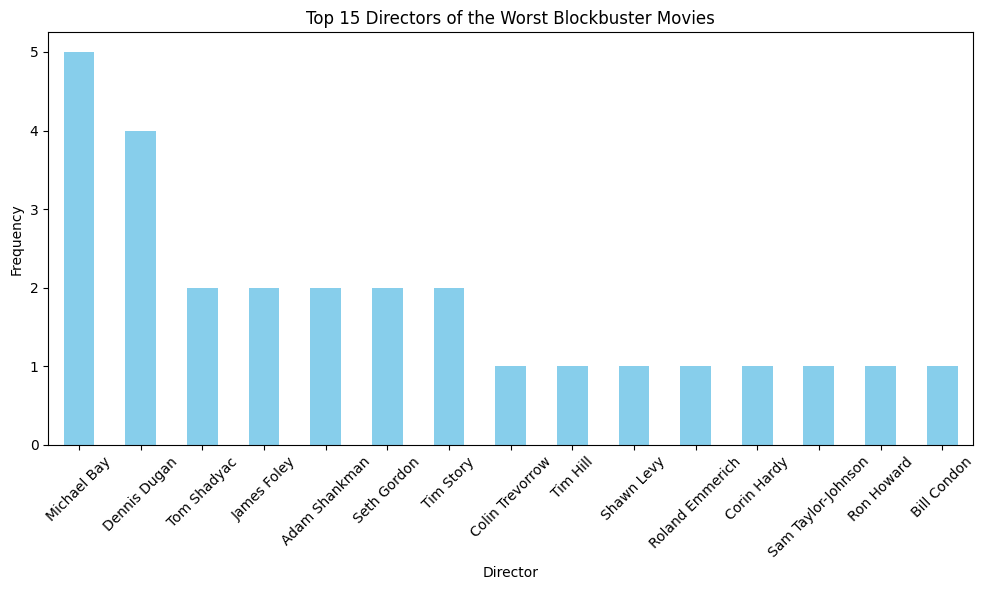

In [210]:
# Plot the bar chart for the top 15 most frequent directors
plt.figure(figsize=(10, 6))
director_counts[:15].plot(kind='bar', color='skyblue')
plt.title('Top 15 Directors of the Worst Blockbuster Movies')
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()

In [ ]:
# Count the frequency of each word in movie names
keywords = []
word_counts = {}

# Define common words to exclude
common_words = ['of', 'the', 'The', 'and', '2']

for name in movies_df['Name']:
    for word in name.split():
        if word.lower() not in common_words:
            keywords.append(word)

# Count the frequency of each word
word_counts = pd.Series(keywords).value_counts()

top_words = word_counts.head(10)

matching_movies = {}
for word in top_words.index:
    matching_movies[word] = movies_df[movies_df['Name'].str.contains(word)]['Name'].tolist()

for word, movies in matching_movies.items():
    print(f"Word: {word}")
    for movie in movies:
        print(f" *{movie}")


Word: Fifty
 *Fifty Shades Darker
 *Fifty Shades Freed
 *Fifty Shades of Grey
Word: Transformers:
 *Transformers: The Last Knight
 *Transformers: Age of Extinction
 *Transformers: Revenge of the Fallen
Word: Wild
 *Wild Hogs
 *Wild Wild West
Word: Alvin
 *Alvin and the Chipmunks: Chipwrecked
 *Alvin and the Chipmunks: The Squeakquel
 *Alvin and the Chipmunks
Word: Shades
 *Fifty Shades Darker
 *Fifty Shades Freed
 *Fifty Shades of Grey
Word: Last
 *The Last Airbender
 *Transformers: The Last Knight
Word: Day
 *Valentine's Day
 *Daddy Day Care
 *Independence Day: Resurgence
Word: Four
 *Four Christmases
 *Fantastic Four
Word: Dawn
 *The Twilight Saga: Breaking Dawn Part 1
 *Batman v Superman: Dawn of Justice
Word: Part
 *The Hangover Part III
 *The Twilight Saga: Breaking Dawn Part 1


In [ ]:
# Create pandas-dataFrame
movie_count_df = pd.DataFrame({'Word': top_words.index, 'Matching Movies': [', '.join(movies) for movies in matching_movies.values()]})

print(movie_count_df)

            Word                                    Matching Movies
0          Fifty  Fifty Shades Darker, Fifty Shades Freed, Fifty...
1  Transformers:  Transformers: The Last Knight, Transformers: A...
2           Wild                          Wild Hogs, Wild Wild West
3          Alvin  Alvin and the Chipmunks: Chipwrecked, Alvin an...
4         Shades  Fifty Shades Darker, Fifty Shades Freed, Fifty...
5           Last  The Last Airbender, Transformers: The Last Knight
6            Day  Valentine's Day, Daddy Day Care, Independence ...
7           Four                   Four Christmases, Fantastic Four
8           Dawn  The Twilight Saga: Breaking Dawn Part 1, Batma...
9           Part  The Hangover Part III, The Twilight Saga: Brea...


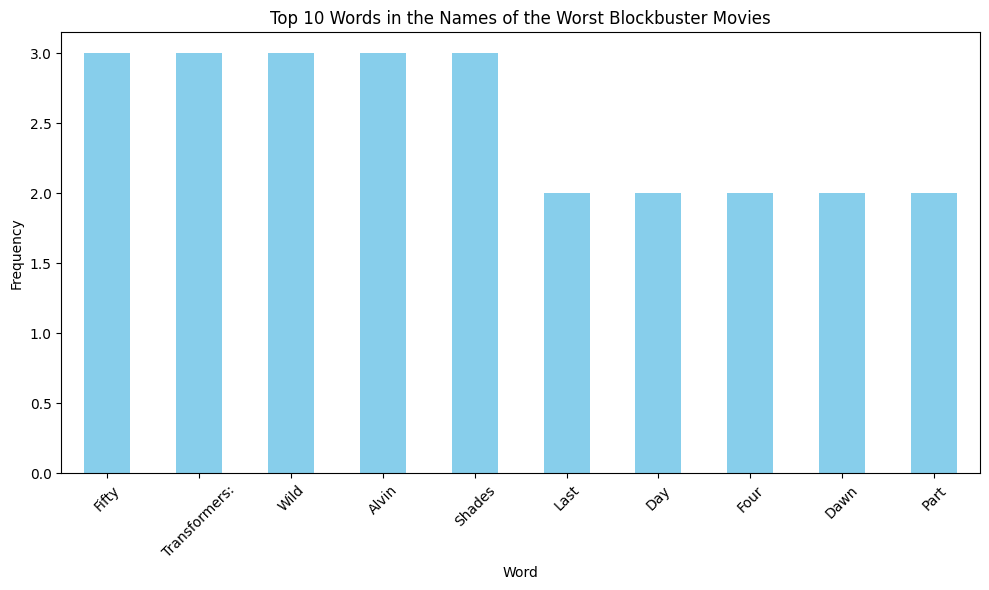

In [211]:
# Plot the bar chart for the top 10 most frequent words in movie names
plt.figure(figsize=(10, 6))
top_words.plot(x='Word', y='Count', kind='bar', color='skyblue')
plt.title('Top 10 Words in the Names of the Worst Blockbuster Movies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()

In [ ]:
# Count the frequency of year
year_counts = movies_df['Year'].value_counts()

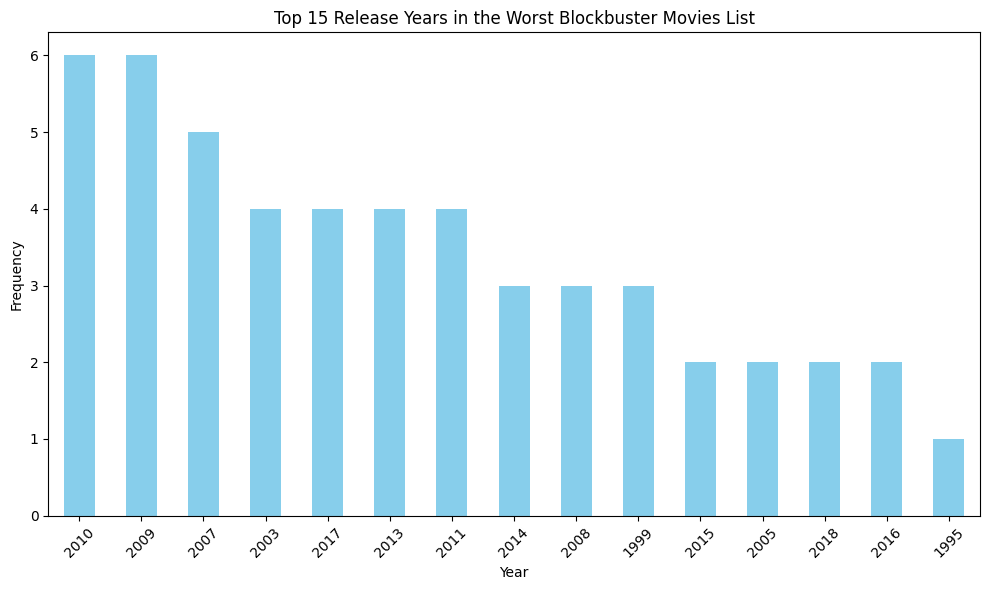

In [208]:
# Plot the bar chart for the top 15 most frequent directors
plt.figure(figsize=(10, 6))
year_counts[:15].plot(kind='bar', color='skyblue')
plt.title('Top 15 Release Years in the Worst Blockbuster Movies List')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()